In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from utils.utils import generate_synthetic_data, generate_final_features, split_dataset
import warnings 
warnings.filterwarnings("ignore")


In [17]:
regular_cycle_data = pd.read_csv('dataset\\regular_cycle_data.csv')
features_regular_cycle_data, labels_regular_cycle_data = generate_final_features(regular_cycle_data)
input_train_regular_cycle, input_test_regular_cycle, output_train_regular_cycle, output_test_regular_cycle = split_dataset(features_regular_cycle_data, labels_regular_cycle_data, reshape=False)

In [8]:
input_train_regular_cycle.shape

(16, 3, 2)

In [169]:
# create and fit the LSTM network
n_features = input_train_regular_cycle.shape[2]
model = Sequential()
model.add(LSTM(128, input_shape=(3, n_features),  activation='tanh'))
model.add(Dense(n_features, activation='relu'))
model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 128)               67072     
                                                                 
 dense_44 (Dense)            (None, 2)                 258       
                                                                 
Total params: 67,330
Trainable params: 67,330
Non-trainable params: 0
_________________________________________________________________


In [170]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt)
# add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping( monitor='val_loss', patience=10, restore_best_weights=True)

In [171]:
history = model.fit(input_train_regular_cycle, output_train_regular_cycle, epochs=1000, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/1000
1/1 [==============================] - 18s 18s/step - loss: 510.1099 - val_loss: 495.9827
Epoch 2/1000
1/1 [==============================] - 0s 171ms/step - loss: 508.9633 - val_loss: 494.8620
Epoch 3/1000
1/1 [==============================] - 0s 168ms/step - loss: 507.8826 - val_loss: 493.8073
Epoch 4/1000
1/1 [==============================] - 0s 140ms/step - loss: 506.8653 - val_loss: 492.8145
Epoch 5/1000
1/1 [==============================] - 0s 180ms/step - loss: 505.9078 - val_loss: 491.8795
Epoch 6/1000
1/1 [==============================] - 0s 253ms/step - loss: 505.0060 - val_loss: 490.9983
Epoch 7/1000
1/1 [==============================] - 0s 223ms/step - loss: 504.1559 - val_loss: 490.1675
Epoch 8/1000
1/1 [==============================] - 0s 222ms/step - loss: 503.3541 - val_loss: 489.3838
Epoch 9/1000
1/1 [==============================] - 0s 247ms/step - loss: 502.5977 - val_loss: 488.6448
Epoch 10/1000
1/1 [==============================] - 0s 212ms/ste

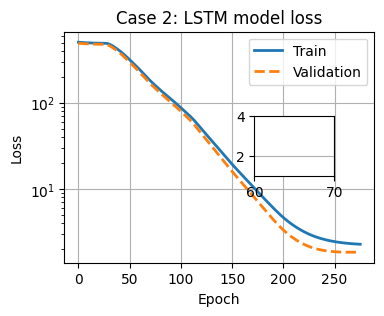

In [178]:
# plot the loss and val loss
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'], '-', linewidth=2)
plt.plot(history.history['val_loss'], '--', linewidth=2)
plt.grid(True)
plt.legend(['Train', 'Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Case 2: LSTM model loss')
# log scale
plt.yscale('log')

# add a zoom in epoch 70 to 100
ax = plt.axes([0.6, 0.4, .20, .20])
plt.plot(history.history['loss'], '-', linewidth=2)
plt.plot(history.history['val_loss'], '--', linewidth=2)
plt.grid(True)
ax.set_ylim(1, 4)
ax.set_xlim(60, 70)


# save history
history_df = pd.DataFrame(history.history)
history_df.to_csv('case2_history_lstm.csv', index=False)


In [173]:
# make predictions
trainPredict = model.predict(input_train_regular_cycle)
testPredict = model.predict(input_test_regular_cycle)
testPredict = np.round(testPredict)

1/1 [==============================] - 0s 140ms/step


In [174]:
# calculate root mean squared error
testScore = np.sqrt(mean_squared_error(output_test_regular_cycle, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# calculate mean absolute error
testScore = mean_absolute_error(output_test_regular_cycle, testPredict)
print('Test Score: %.2f MAE' % (testScore))

# calculate r2 score
testScore = r2_score(output_test_regular_cycle, testPredict)
print('Test Score: %.2f R2' % (testScore))




Test Score: 2.55 RMSE
Test Score: 2.10 MAE
Test Score: -2.18 R2


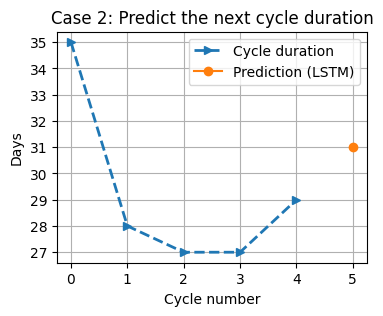

In [175]:
# plot baseline and predictions
plt.figure(figsize=(4, 3))
plt.plot(np.arange(5),output_test_regular_cycle[:,0], '-->', linewidth=2.0)
plt.plot(np.arange(5, 6),testPredict[0,0], '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylabel('Days')
plt.xlabel('Cycle number')
plt.legend(['Cycle duration', 'Prediction (LSTM)'])
plt.title('Case 2: Predict the next cycle duration')
plt.grid(True)
plt.show()

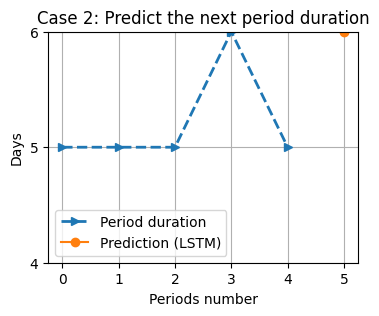

In [179]:
plt.figure(figsize=(4, 3))
plt.plot(np.arange(5),output_test_regular_cycle[:,1], '-->', linewidth=2.0)
plt.plot(np.arange(5, 6),testPredict[0,1], '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
#set the y axis range
plt.ylim(4, 6)
plt.ylabel('Days')
plt.xlabel('Periods number')
plt.legend(['Period duration', 'Prediction (LSTM)'])
plt.title('Case 2: Predict the next period duration')
plt.grid(True)
plt.show()

In [180]:
# save model 
model.save('case2_lstm_model.h5')